In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [46]:
branch = pd.read_csv('data/branch.csv')
branch

,p,execution_time
0,1.0,910
1,0.9,1800
2,0.8,1813
3,0.7,1822
4,0.6,1827
5,0.5,1827
6,0.4,1827
7,0.3,1830
8,0.2,1841
9,0.1,1841


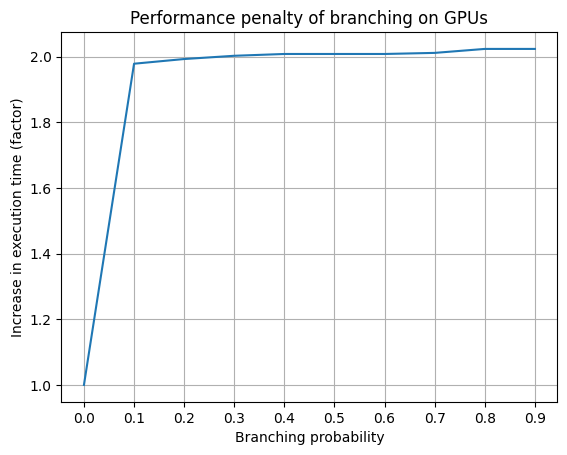

In [47]:
x = [1 - x for x in branch['p']]
y = [ x / branch['execution_time'][0] for x in  list(branch['execution_time'])]
plt.xticks(x)
plt.plot(x, y)
plt.xlabel('Branching probability')
plt.ylabel('Increase in execution time (factor)')
plt.title("Performance penalty of branching on GPUs")
plt.grid(True)
plt.show()

In [48]:
latency = pd.read_csv('data/latency.csv')
latency

,N,reads,threadCount,blockCount,latency
0,0.0625,262144,1,1,28.1273
1,0.1250,262144,1,1,28.1276
2,0.2500,262144,1,1,28.1303
3,0.5000,262144,1,1,28.1628
4,1.0000,262144,1,1,28.1600
5,2.0000,262144,1,1,26.0469
6,4.0000,262144,1,1,111.6020
7,8.0000,262144,1,1,80.2021
8,16.0000,262144,1,1,133.0290
9,32.0000,262144,1,1,133.0520


In [49]:
def sizeToKB(size):
    return size*1024

In [50]:
latency['size'] = list(map(sizeToKB, latency['N']))
latency

,N,reads,threadCount,blockCount,latency,size
0,0.0625,262144,1,1,28.1273,64.0
1,0.1250,262144,1,1,28.1276,128.0
2,0.2500,262144,1,1,28.1303,256.0
3,0.5000,262144,1,1,28.1628,512.0
4,1.0000,262144,1,1,28.1600,1024.0
5,2.0000,262144,1,1,26.0469,2048.0
6,4.0000,262144,1,1,111.6020,4096.0
7,8.0000,262144,1,1,80.2021,8192.0
8,16.0000,262144,1,1,133.0290,16384.0
9,32.0000,262144,1,1,133.0520,32768.0


In [51]:
one_thread = latency[(latency['threadCount'] == 1) & (latency['blockCount'] == 1)]
one_thread

,N,reads,threadCount,blockCount,latency,size
0,0.0625,262144,1,1,28.1273,64.0
1,0.1250,262144,1,1,28.1276,128.0
2,0.2500,262144,1,1,28.1303,256.0
3,0.5000,262144,1,1,28.1628,512.0
4,1.0000,262144,1,1,28.1600,1024.0
5,2.0000,262144,1,1,26.0469,2048.0
6,4.0000,262144,1,1,111.6020,4096.0
7,8.0000,262144,1,1,80.2021,8192.0
8,16.0000,262144,1,1,133.0290,16384.0
9,32.0000,262144,1,1,133.0520,32768.0


In [52]:
one_block = latency[(latency['threadCount'] == 128) & (latency['blockCount'] == 1)]
one_block

,N,reads,threadCount,blockCount,latency,size
19,0.0625,262144,128,1,31.0715,64.0
20,0.1250,262144,128,1,35.7611,128.0
21,0.2500,262144,128,1,38.3048,256.0
22,0.5000,262144,128,1,37.0907,512.0
23,1.0000,262144,128,1,34.5658,1024.0
24,2.0000,262144,128,1,34.7566,2048.0
25,4.0000,262144,128,1,152.6590,4096.0
26,8.0000,262144,128,1,156.2840,8192.0
27,16.0000,262144,128,1,161.1220,16384.0
28,32.0000,262144,128,1,163.6360,32768.0


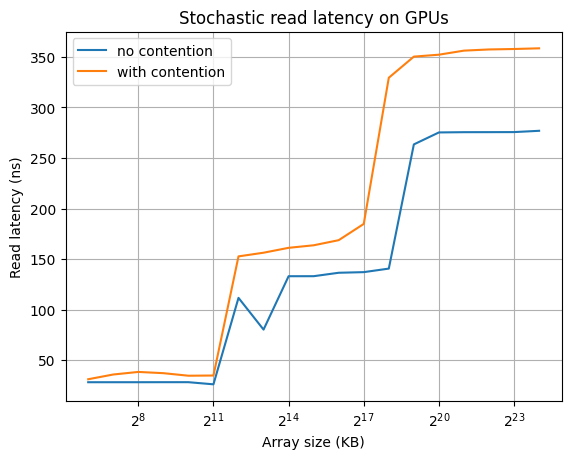

In [53]:
x = list(one_thread['size'])
y = list(one_thread['latency'])
plt.xticks(x)
plt.plot(x, y, label='no contention')
plt.xlabel('Array size')
plt.ylabel('Read latency (ns)')
plt.xscale('log', base=2)
plt.title("Stochastic read latency on GPUs")
plt.grid(True)


x = list(one_block['size']) 
y = list(one_block['latency'])
plt.xticks(x)
plt.plot(x, y, label='with contention')
plt.xlabel('Array size (KB)')
plt.ylabel('Read latency (ns)')
plt.xscale('log', base=2)
plt.title("Stochastic read latency on GPUs")
plt.grid(True)
plt.legend()
plt.show()